<a href="https://colab.research.google.com/github/bhaveenthank/sl_tamil_multi_dialect_speech_corpus/blob/main/Error_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas jiwer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.3 MB/s eta 0:00:00


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install jiwer
import pandas as pd
import re
from jiwer import cer

# Load CSV
file_path = '/content/drive/MyDrive/Arranged Transcriptions.csv'
df = pd.read_csv(file_path)

# Display first few rows to verify
df.head()

# Function to extract dialect and gender
def extract_info(filename):
    parts = filename.split('_')
    dialect = parts[1].capitalize()
    gender = parts[2].capitalize()
    return pd.Series([dialect, gender])

# Create new columns, using 'filename' instead of 'Filename'
df[['Dialect', 'Gender']] = df['filename'].apply(extract_info)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 46.1 MB/s eta 0:00:00


In [3]:
# Compute CER for each model
model_cols = ['amrrs_transcription', 'Rajaram1996_transcription', 'Harveenchandha_transcription']
for i, model_col in enumerate(model_cols):
    cer_col = f'Model{i+1}_CER'
    # Calculate CER using ground truth column and model column
    df[cer_col] = df.apply(lambda row: cer(row['Ground_truth_transcription'], row[model_col]), axis=1)

# Group and calculate mean CER
grouped = df.groupby(['Dialect', 'Gender'])[[f'Model{i}_CER' for i in range(1, 4)]].mean().reset_index()

# Preview
grouped

# Save result
output_path = '/content/drive/MyDrive/CER_Dialect_Gender_Comparison.csv'
grouped.to_csv(output_path, index=False)

print("CER analysis saved in the path :", output_path)

CER analysis saved in the path : /content/drive/MyDrive/CER_Dialect_Gender_Comparison.csv


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


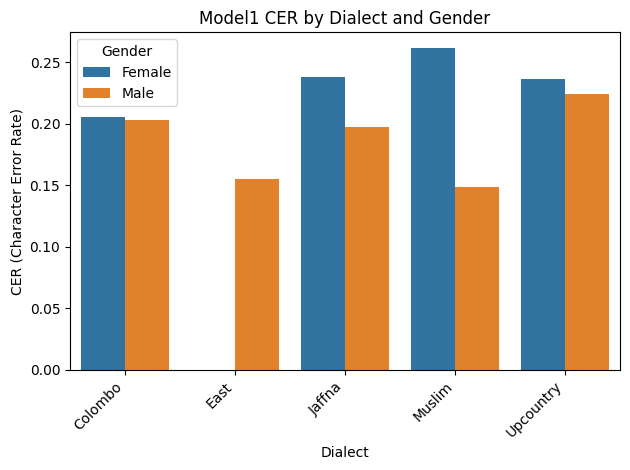

CER analysis saved in the path: /content/drive/MyDrive/CER_Dialect_Gender_Comparison_2.csv


In [4]:
!pip install pandas jiwer seaborn matplotlib
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import re
from jiwer import cer
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV from Google Drive
file_path = '/content/drive/MyDrive/Arranged Transcriptions.csv'
df = pd.read_csv(file_path)

# Display first few rows for verification
df.head()

# Function to extract dialect and gender
def extract_info(filename):
    parts = filename.split('_')
    dialect = parts[1].capitalize()
    gender = parts[2].capitalize()
    return pd.Series([dialect, gender])

# Create new columns, using 'filename' instead of 'Filename'
df[['Dialect', 'Gender']] = df['filename'].apply(extract_info)

# Compute CER for each model
model_cols = ['amrrs_transcription', 'Rajaram1996_transcription', 'Harveenchandha_transcription']
for i, model_col in enumerate(model_cols):
    cer_col = f'Model{i+1}_CER'
    # Calculate CER using ground truth column and model column
    df[cer_col] = df.apply(lambda row: cer(row['Ground_truth_transcription'], row[model_col]), axis=1)

# Group and calculate mean CER
grouped = df.groupby(['Dialect', 'Gender'])[[f'Model{i}_CER' for i in range(1, 4)]].mean().reset_index()

# Preview
grouped

# Create bar plot using
sns.barplot(data=grouped, x='Dialect', y='Model1_CER', hue='Gender')
plt.title("Model1 CER by Dialect and Gender")
plt.ylabel("CER (Character Error Rate)")
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

# Save result
output_path = '/content/drive/MyDrive/CER_Dialect_Gender_Comparison_2.csv'
grouped.to_csv(output_path, index=False)

print("CER analysis saved in the path:", output_path)